# Importing Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Downloading .jpg files

In [2]:
mask_dir = 'C:/Users/parvs/Desktop/Python/CNN/data/with_mask'
not_mask_dir = 'C:/Users/parvs/Desktop/Python/CNN/data/without_mask'

# Check if the directories exist
if not os.path.exists(mask_dir) or not os.path.exists(not_mask_dir):
    print("Error: The specified directories do not exist.")
else:
    # List files in the mask directory
    mask_files = os.listdir(mask_dir)
    
    # List files in the not_mask directory
    not_mask_files = os.listdir(not_mask_dir)

In [3]:
type(mask_files)

list

In [4]:
type(not_mask_files)

list

In [5]:
print(mask_files[:5])
print(not_mask_files[:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [6]:
print(len(mask_files))
print(len(not_mask_files))

3725
3828


## Making List variables as image labels

In [7]:
mask_labels = [1]*3725
not_mask_labels = [0]*3828
dataset_labels = mask_labels+not_mask_labels

## Image Displaying

In [8]:
def image_show(s):
   img = mpimg.imread(s)
   plt.imshow(img)
   plt.show()

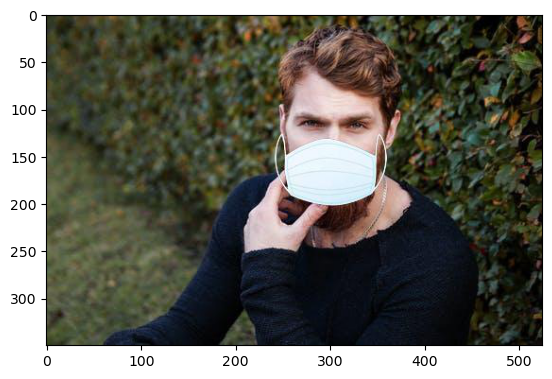

In [9]:
image_show('C:/Users/parvs/Desktop/Python/CNN/data/with_mask/with_mask_1.jpg')

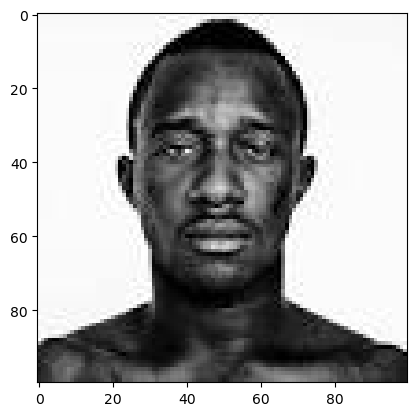

In [10]:
image_show('C:/Users/parvs/Desktop/Python/CNN/data/without_mask/without_mask_1.jpg')

# Image Pre-Processing

## Resizing, Converting and making a dataset

In [11]:
dataset = []

for img_file in mask_files:

  image = Image.open('C:/Users/parvs/Desktop/Python/CNN/data/with_mask/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

for img_file in not_mask_files:

  image = Image.open('C:/Users/parvs/Desktop/Python/CNN/data/without_mask/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

c:\Users\parvs\.conda\envs\myenv\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(dataset)

list

In [13]:
dataset[10]

array([[[170, 164, 166],
        [177, 171, 173],
        [179, 173, 175],
        ...,
        [154, 152, 157],
        [169, 167, 172],
        [178, 176, 181]],

       [[179, 173, 175],
        [183, 177, 179],
        [185, 179, 181],
        ...,
        [132, 130, 134],
        [123, 121, 125],
        [127, 125, 129]],

       [[188, 180, 183],
        [191, 183, 186],
        [182, 175, 177],
        ...,
        [213, 211, 214],
        [184, 182, 185],
        [158, 156, 159]],

       ...,

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 71,  48,  48],
        [ 84,  61,  63],
        [117,  94,  97]],

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 76,  52,  50],
        [ 96,  72,  71],
        [131, 107, 108]],

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 85,  60,  57],
        [ 99,  73,  73],
        [128, 104, 104]]

In [14]:
print(len(dataset))
print(dataset[0].shape)

7553
(128, 128, 3)


## Converting in numpy arrays

In [15]:
X = np.array(dataset)
Y = np.array(dataset_labels)

In [16]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


# Using Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Scaling

In [18]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


# Building CNN Model

In [19]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=5)

Epoch 1/5
133/133 [==============================] - 30s 212ms/step - loss: 0.5681 - accuracy: 0.7243 - val_loss: 0.3059 - val_accuracy: 0.8820
Epoch 2/5
133/133 [==============================] - 26s 192ms/step - loss: 0.3329 - accuracy: 0.8754 - val_loss: 0.2776 - val_accuracy: 0.8891
Epoch 3/5
133/133 [==============================] - 26s 193ms/step - loss: 0.2643 - accuracy: 0.8934 - val_loss: 0.2401 - val_accuracy: 0.9035
Epoch 4/5
133/133 [==============================] - 25s 190ms/step - loss: 0.2314 - accuracy: 0.9106 - val_loss: 0.2234 - val_accuracy: 0.9129
Epoch 5/5
133/133 [==============================] - 25s 187ms/step - loss: 0.1894 - accuracy: 0.9243 - val_loss: 0.2408 - val_accuracy: 0.9112


# Evaluating Model Using Test data

In [20]:
loss, accuracy = model.evaluate(X_test,Y_test)

48/48 [==============================] - 2s 50ms/step - loss: 0.2398 - accuracy: 0.9140


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


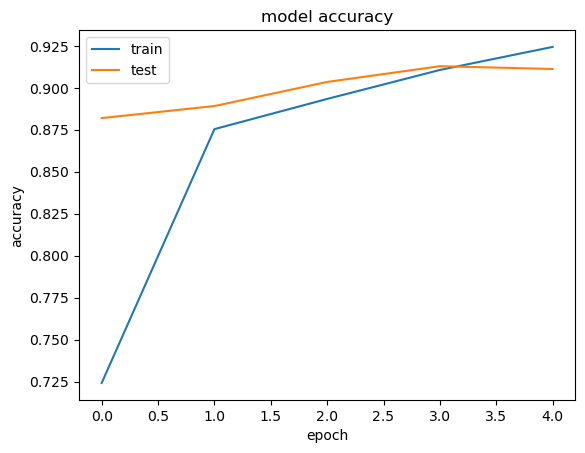

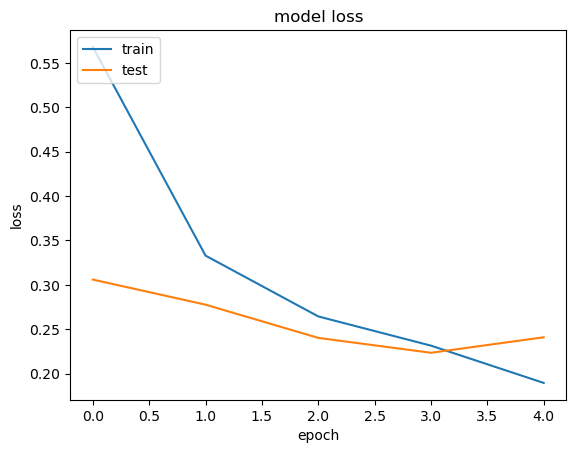

In [21]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the Model

In [22]:
import pickle
from keras.models import load_model

with open('trained_model.pickle', 'wb') as f:
    pickle.dump(model, f)

model.save('trained_model.h5')

INFO:tensorflow:Assets written to: ram://068cb551-56da-4353-8367-176b4b99dd19/assets


INFO:tensorflow:Assets written to: ram://068cb551-56da-4353-8367-176b4b99dd19/assets
